In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

#importing necessary libraries for this analysis

In [10]:
#loading our dataset into this workbook
Sd= pd.read_csv(r'C:\Users\USER\Customer-segmentation\segmentation_data.csv')


In [3]:
Sd

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


### Cleaning the Data
Handling outliers, missing values and any inconsistencies in the dataset.

In [5]:
#Checking our dataset for any missing values
print(Sd.isnull().sum())


ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


### Exploratory Data Analysis
Understanding the structure of the data and visualising important features.

In [6]:
#summary statistics of the dataset
print(Sd.describe())



                 ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000        

In [7]:
#structure of the dataset
print(Sd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
None


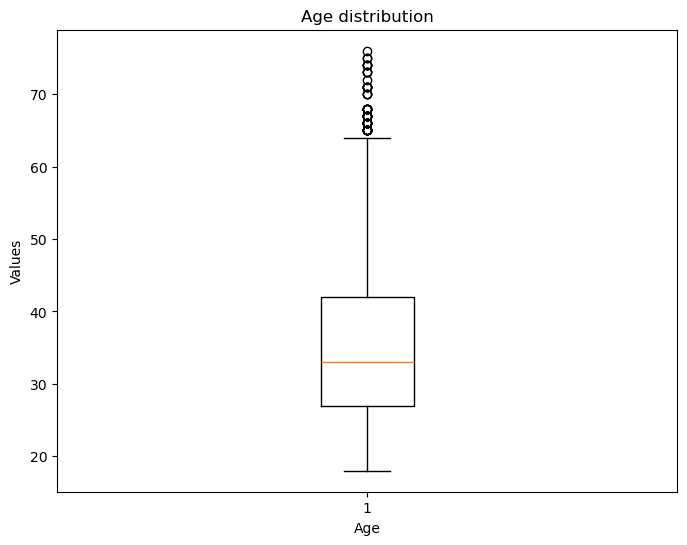

In [8]:
#checking out if we have ouliers in the age of customers
plt.figure(figsize=(8,6))  
plt.boxplot(Sd['Age'])
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

From the age disribution plot, I observed that most customers age ranges between about 
25-45 years and there are also outliers , which are customers above 65 years old.

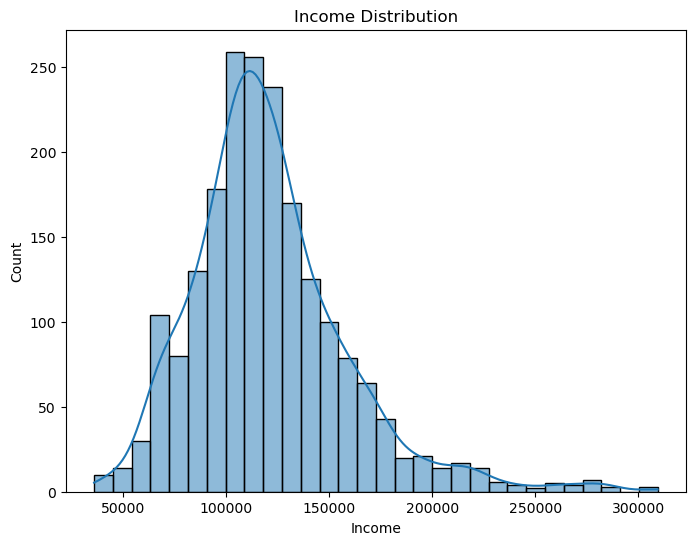

In [9]:
# The Income distribution of customers
plt.figure(figsize=(8, 6))
sns.histplot(Sd['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

From the Income distribution plot, I have observed that the customers income ranges from $50,000 to $300,000 but we have most of the customers earning between about $90,000 to $150,000

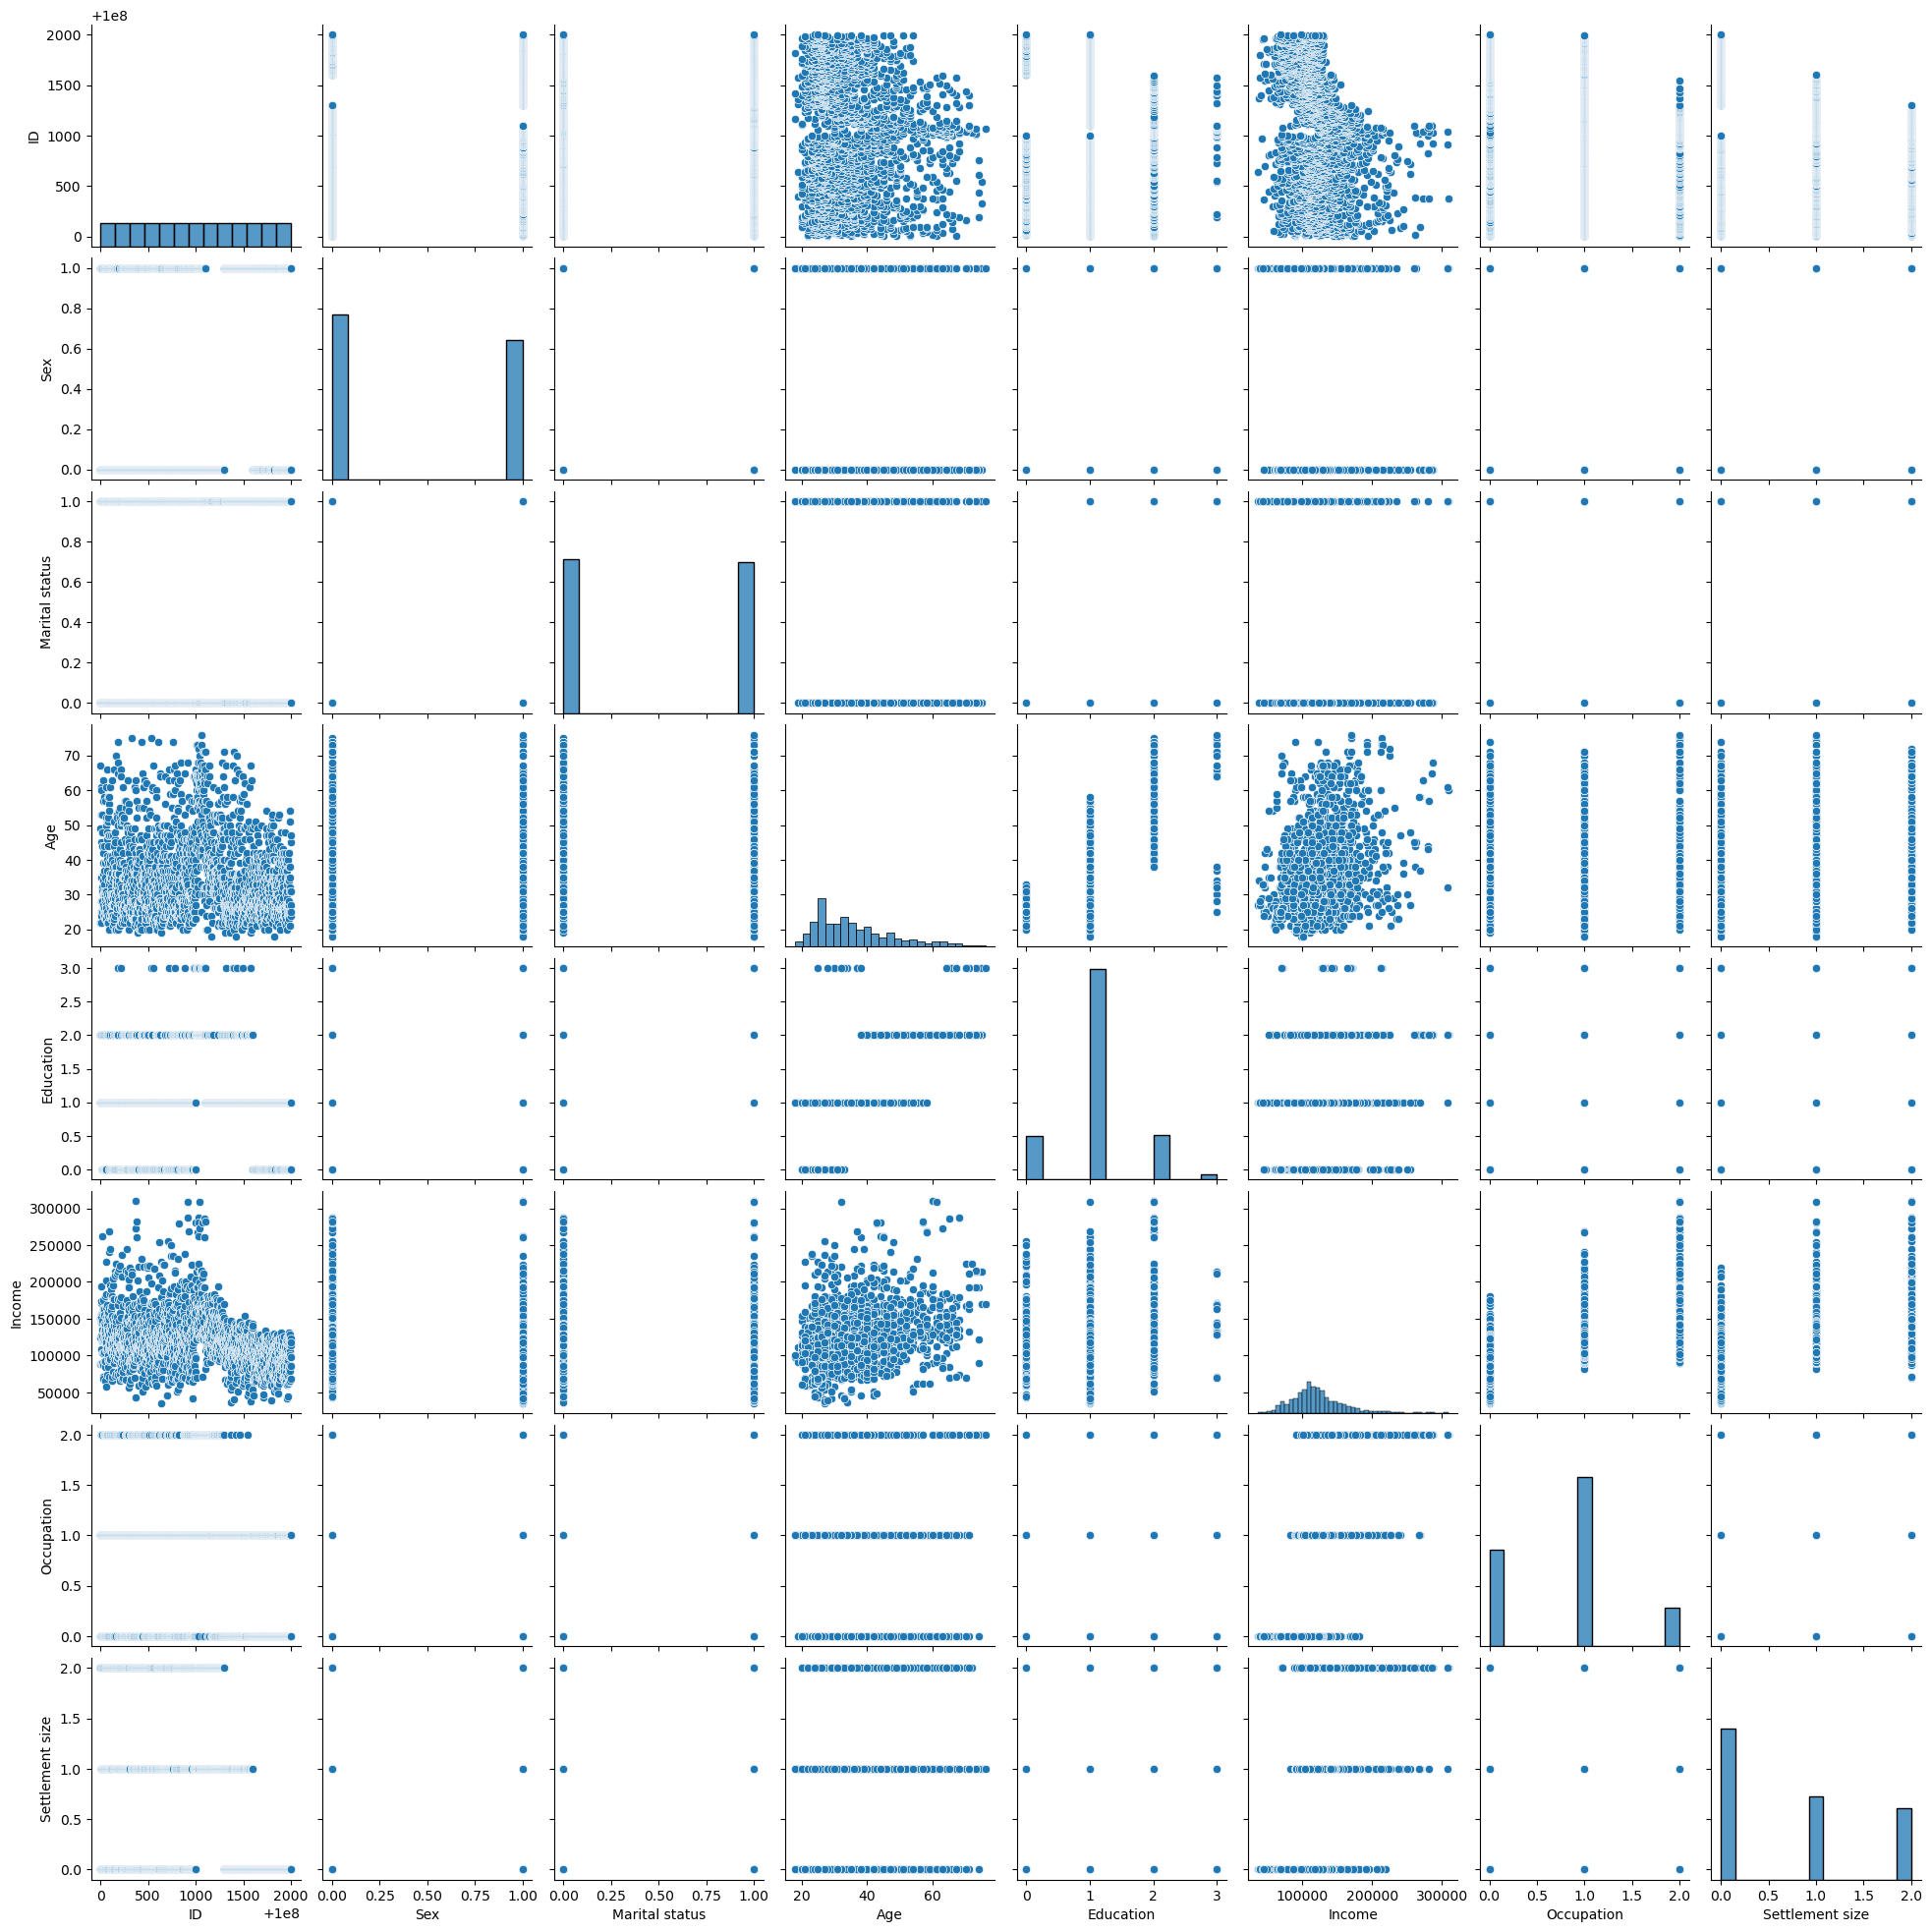

In [4]:
# Pairplot for visualizing relationships
sns.pairplot(Sd)
plt.show()



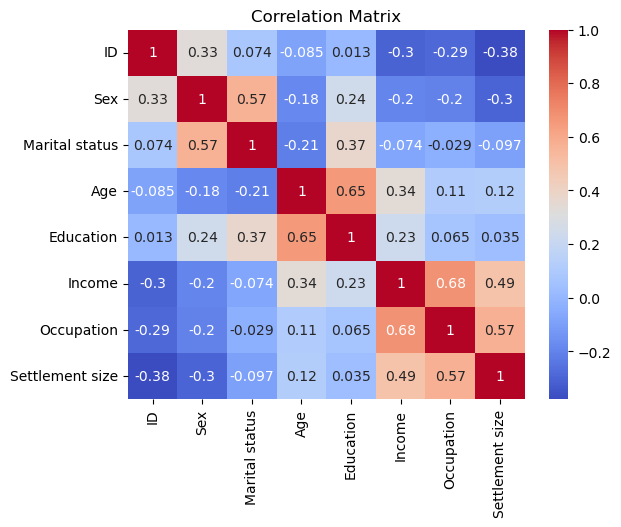

In [5]:

# Correlation matrix heatmap
corr_matrix = Sd.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the Correlation heatmap, I have observed that most variables have low to moderate correlations with each other . While the variables with same values have the highest correlation .

In [7]:
# Example: Creating new features or normalizing existing ones
scaler = StandardScaler()
data_scaled = scaler.fit_transform(Sd)

In [8]:
# Convert back to DataFrame for convenience
data_scaled = pd.DataFrame(data_scaled, columns=Sd.columns)

In [9]:
data_scaled

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298
...,...,...,...,...,...,...,...,...
1995,1.724257,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730
1996,1.725989,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730
1997,1.727721,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730
1998,1.729453,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730


In [10]:
Sd

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


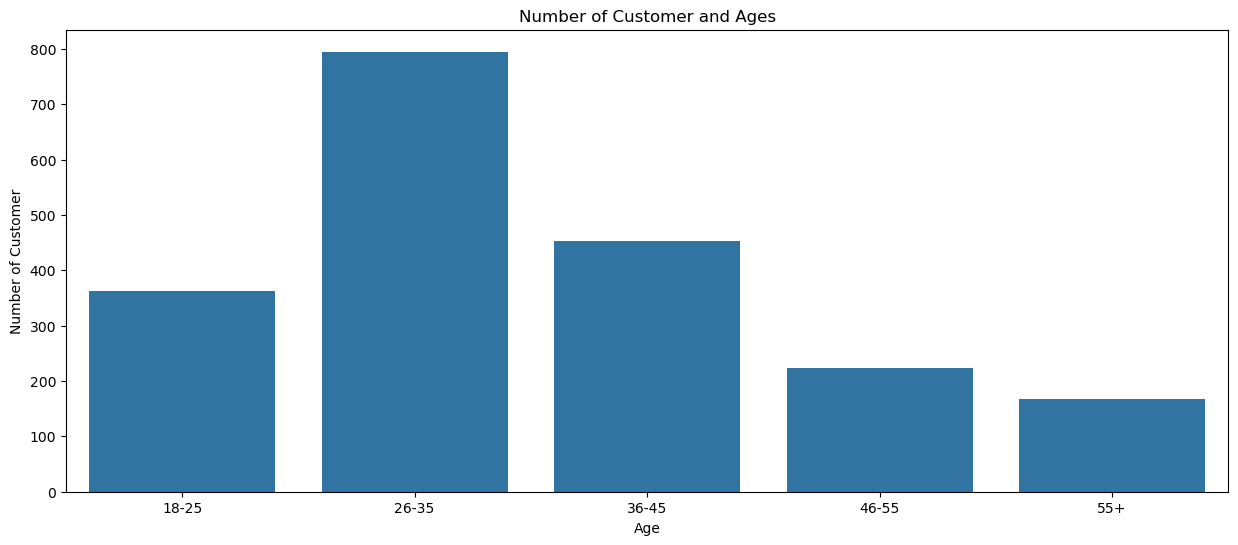

In [7]:
#Dividing age into categories to know which age range has the highest no. of customers

age_18_25 = Sd.Age[(Sd.Age >= 18) & (Sd.Age <= 25)]
age_26_35 = Sd.Age[(Sd.Age >= 26) & (Sd.Age <= 35)]
age_36_45 = Sd.Age[(Sd.Age >= 36) & (Sd.Age <= 45)]
age_46_55 = Sd.Age[(Sd.Age >= 46) & (Sd.Age <= 55)]
age_55above = Sd.Age[Sd.Age >= 56]


agex = ["18-25","26-35","36-45","46-55","55+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values),]



plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey)
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

From this plot, it is observed that most customers in this business are between the ages of 26-35


<Axes: xlabel='count', ylabel='Sex'>

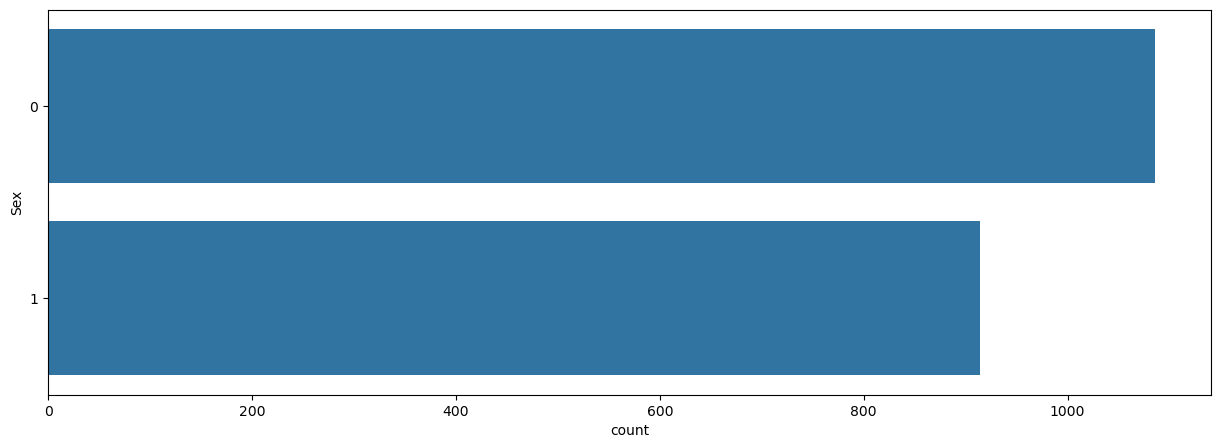

In [12]:
#showing comparism between number of Male and Female in which male is represented as 1, and female as 0

plt.figure(figsize=(15,5))
sns.countplot(y='Sex', data=Sd)

0 represents the females and 1 represent the Males, and from this plot we can see that the female customers are more than the male customers

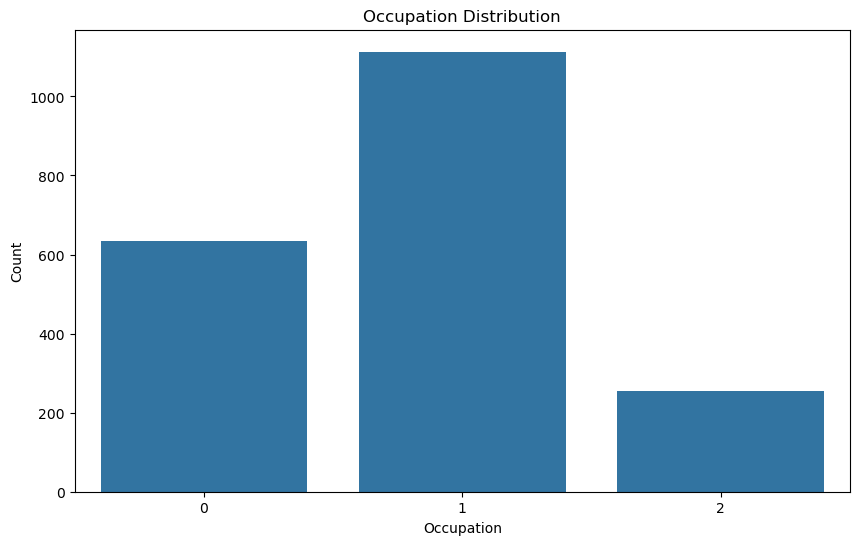

In [13]:
# Distribution of occupation
plt.figure(figsize=(10, 6))
sns.countplot(data=Sd, x='Occupation')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')

plt.show()

0 represents Unemployed customers,
1 represents employees, and 
2 represents self-employed customers
So this occupation distribution shows the most of the customers are actually employees
 

In [11]:
#To determine the optimal number of clusters using the Elbow method


In [12]:
#fit the K-means with the optimal number of clusters

In [ ]:
#visualise the clusters using the pairplot